## Bank Note data processing for Decision Making

#### Bank note authentication data:
https://archive.ics.uci.edu/ml/datasets/banknote+authentication#

Download the data set consisting of the actual data and the data set information is given in the webpage. 


You are required to do the following:
______________________________________________________________________
1.	Construct a Bayesian Belief Network for the given data.
2. Use appropriate methods to predict the following:

Predict the probability of  data having the following values:
> Variance: 3.6216 , skewness: 8.6661, curtosis : -2.8073 , entropy : -0.44699, and the class is 0.

Predict the if the note is genuine or fake with the following attribute values: 
> Variance: -1.8439, skewness: -8.6475, curtosis : 7.6796 , entropy : -0.66682.

3.	Infer the probability for the data : with values 
> a.	0 for all attributes with class 0  
> b.	1 for all the attributes with class 1


In [71]:
from pomegranate import *

In [72]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [73]:
import graphviz
import pygraphviz
import pydotplus
import pandas as pd
# import pydot
from IPython.display import Image
# from sklearn.externals.six import StringIO
from six import StringIO

In [74]:
working_dir = Path(r'./')

### Load original data from Txt file

In [75]:
data_original = np.loadtxt((working_dir.joinpath('data_banknote_authentication.txt')), 
                           dtype='float', delimiter=',', unpack=True)

##### Loading data from csv

In [78]:
data = pd.read_csv(working_dir.joinpath('banking.csv'))  # csv is attached with explaination document shared

In [79]:
data

,Variance,Skew,Kurtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [80]:
variance = data['Variance'].values
skew = data['Skew'].values
kurtosis = data['Kurtosis'].values
entropy = data['Entropy'].values
target = data['Class'].values

In [81]:
variance

array([ 3.6216,  4.5459,  3.866 , ..., -3.7503, -3.5637, -2.5419])

In [82]:
X = np.array([variance, skew, kurtosis, entropy])
X = X.transpose()

In [83]:
scaler = MinMaxScaler() # StandardScaler
X_scaled = scaler.fit_transform(X)

#### Finding the correlation of the features present

In [84]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_scaled,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(["variance", "skew", "kurtosis", "entropy"])
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(6,'Score'))  # print best features

      Specs      Score
0  variance  56.152306
1      skew  22.263644
2  kurtosis   3.988757
3   entropy   0.041042


#### Using Binning to convert the Continuous Variables into Discrete Variables 

In [117]:
    def datalabel(num, bins):
        labels = ['A','B','C','D','E', 'F' ,'G']
        label = None

        for i in range(7):
#             print(i,num)
    #     if num in list(np.arange(bins0[i], bins0[i+1], 1)):
            if num >= bins[i] and num < bins[i+1]+0.00000001:
#                 print(bins[i], bins[i+1])
                label = labels[i]

            else:
                continue
        return label

In [86]:
v_array = [] 
for value in variance:
    v_array.append(datalabel(value, np.linspace(min(variance), max(variance), 8)))

s_array = [] 
for value in skew:
    s_array.append(datalabel(value, np.linspace(min(skew), max(skew), 8)))

k_array = [] 
for value in kurtosis:
    k_array.append(datalabel(value, np.linspace(min(kurtosis), max(kurtosis), 8)))
    
e_array = [] 
for value in entropy:
    e_array.append(datalabel(value, np.linspace(min(entropy), max(entropy), 8)))

In [87]:
np.linspace(min(variance), max(variance), 8)

array([-7.0421    , -5.06111429, -3.08012857, -1.09914286,  0.88184286,
        2.86282857,  4.84381429,  6.8248    ])

In [88]:
a = np.array([v_array, s_array, k_array, e_array, target])

In [89]:
a.shape

(5, 1372)

In [90]:
X = a.transpose()

In [91]:
X.shape

(1372, 5)

#### Using Bayesian Network to create a network from sample

In [92]:
model = BayesianNetwork.from_samples(X, algorithm='greedy', 
#                                      include_edges = [(0,4),(1,4)]
                                    )

In [ ]:
model.fit(X)

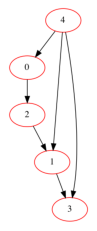

In [94]:
model.plot()  # greedy plot

In [95]:
model.state_count(), model.node_count()

(5, 5)

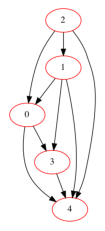

In [193]:
model.plot()  # exact plot

In [96]:
def convert_labels(y_test_2):
    t_test = [0 , 0 , 0 , 0 , None]
    t_test[0] = datalabel(y_test_2[0], np.linspace(min(variance), max(variance), 8))
    t_test[1] = datalabel(y_test_2[1], np.linspace(min(skew), max(skew), 8))
    t_test[2] = datalabel(y_test_2[2], np.linspace(min(kurtosis), max(kurtosis), 8))
    t_test[3] = datalabel(y_test_2[3], np.linspace(min(entropy), max(entropy), 8))
    return t_test

In [97]:
# Variance: 3.6216 , skewness: 8.6661, curtosis : -2.8073 , entropy : -0.44699, and the class is 0.
test = [3.6216, 8.6661, -2.8073, -0.44699, None]

In [98]:
t_test = convert_labels(test)

In [99]:
y_test = np.reshape(t_test, (1, 5))

In [100]:
y_test.shape, y_test

((1, 5), array([['F', 'F', 'A', 'F', None]], dtype=object))

In [101]:
print(model.predict(y_test))

[array(['F', 'F', 'A', 'F', '0'], dtype=object)]


In [102]:
print(model.probability(y_test))

0.30324909747292417


In [103]:
print(model.predict_proba(y_test))

[array(['F', 'F', 'A', 'F', {
                               "class" : "Distribution",
                               "dtype" : "numpy.str_",
                               "name" : "DiscreteDistribution",
                               "parameters" : [
                                   {
                                       "1" : 0.0,
                                       "0" : 1.0
                                   }
                               ],
                               "frozen" : false
                           }                                   ],
      dtype=object)]


In [104]:
# Variance: -1.8439 , skewness: -8.6475, curtosis : 7.6796 , entropy : -0.66682
y_test_2 = [-1.8439, -8.6475, 7.6796, -0.66682, None]

In [105]:
t_test = convert_labels(y_test_2)

In [108]:
y_test_2 = np.reshape(t_test, (1, 5))
y_test_2.shape, y_test_2

((1, 5), array([['C', 'B', 'D', 'F', None]], dtype=object))

In [109]:
print(model.predict(y_test_2))

[array(['C', 'B', 'D', 'F', '1'], dtype=object)]


In [110]:
print(model.probability(y_test_2))

0.22666666666666666


In [118]:
print(model.predict_proba(y_test_2))

[array(['C', 'B', 'D', 'F', {
                               "class" : "Distribution",
                               "dtype" : "numpy.str_",
                               "name" : "DiscreteDistribution",
                               "parameters" : [
                                   {
                                       "1" : 0.9932729935850734,
                                       "0" : 0.006727006414926559
                                   }
                               ],
                               "frozen" : false
                           }                                     ],
      dtype=object)]


In [111]:
test0 = [0., 0., 0., 0., 0]
test1 = [1., 1., 1., 1., 1]

In [112]:
t_test0 = convert_labels(test0)
t_test1 = convert_labels(test1)

In [113]:
y_test_0 = np.reshape(t_test0, (1, 5))
y_test_0.shape, y_test_0

((1, 5), array([['D', 'D', 'B', 'F', None]], dtype=object))

In [114]:
y_test_1 = np.reshape(t_test1, (1, 5))
y_test_1.shape, y_test_1

((1, 5), array([['E', 'D', 'B', 'G', None]], dtype=object))

In [115]:
print(model.predict(y_test_0))
print(model.probability(y_test_0))

[array(['D', 'D', 'B', 'F', '1'], dtype=object)]
0.4155844155844156


In [119]:
print(model.predict_proba(y_test_0))

[array(['D', 'D', 'B', 'F', {
                               "class" : "Distribution",
                               "dtype" : "numpy.str_",
                               "name" : "DiscreteDistribution",
                               "parameters" : [
                                   {
                                       "1" : 0.8569481500025946,
                                       "0" : 0.14305184999740528
                                   }
                               ],
                               "frozen" : false
                           }                                    ],
      dtype=object)]


In [120]:
print(model.predict(y_test_1))
print(model.probability(y_test_1))

[array(['E', 'D', 'B', 'G', '0'], dtype=object)]
0.3405797101449276


In [121]:
print(model.predict_proba(y_test_1))

[array(['E', 'D', 'B', 'G', {
                               "class" : "Distribution",
                               "dtype" : "numpy.str_",
                               "name" : "DiscreteDistribution",
                               "parameters" : [
                                   {
                                       "1" : 0.147773822754657,
                                       "0" : 0.852226177245343
                                   }
                               ],
                               "frozen" : false
                           }                                   ],
      dtype=object)]


### using Decision Tree Classifier

In [122]:
X_data = np.loadtxt((working_dir.joinpath('data_banknote_authentication.txt')), 
                    dtype='float', delimiter=',', usecols=(0,1,2,3), unpack=True)
Y_data = np.loadtxt((working_dir.joinpath('data_banknote_authentication.txt')), 
                    dtype='float', delimiter=',', usecols=(4), unpack=True)

In [123]:
X = X_data.transpose()

In [124]:
X.shape, Y_data.shape

((1372, 4), (1372,))

In [125]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y_data)

In [126]:
clf.predict([[1., 1., 1., 1.]])

array([1.])

In [127]:
clf.predict([[0., 0., 0., 0.]])

array([1.])

In [128]:
clf.predict([[-1.8439, -8.6475, 7.6796, -0.66682]])

array([1.])

In [129]:
clf.predict([[3.6216, 8.6661, -2.8073, -0.44699]])

array([0.])

### plotting the decision tree

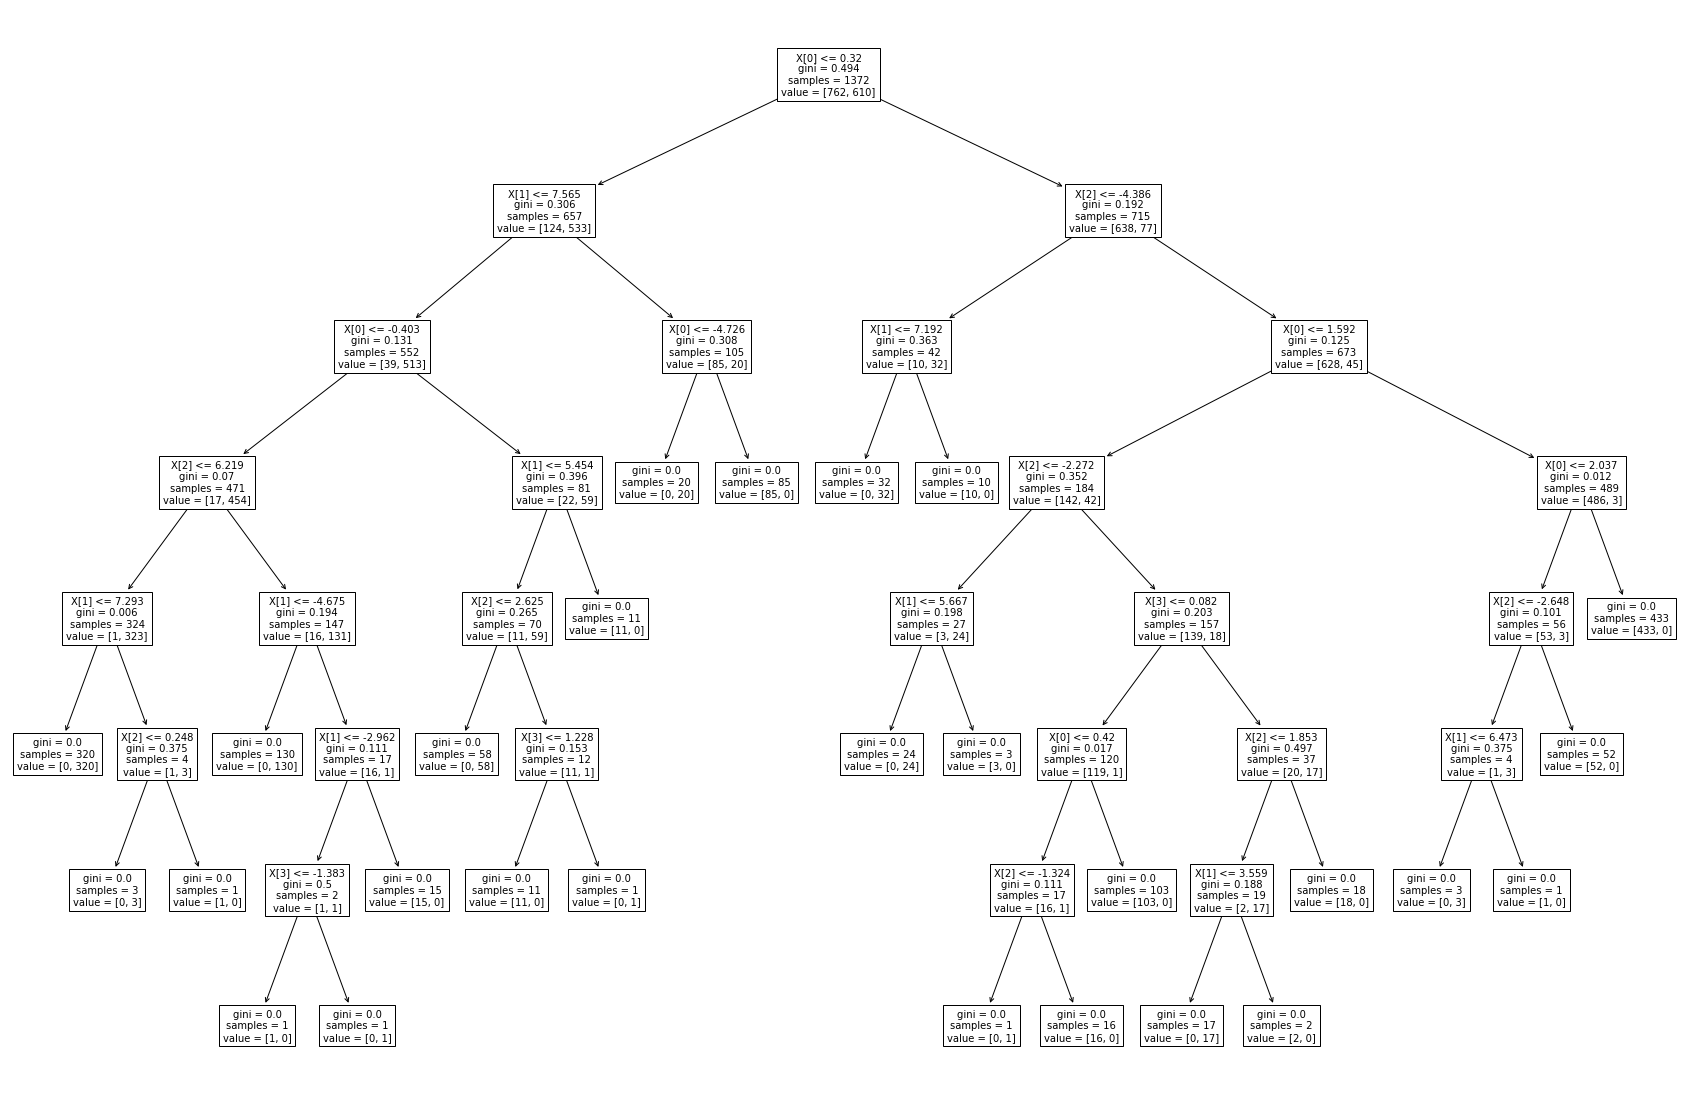

In [130]:
plt.figure(figsize=(30,20))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.savefig('tree.png')
plt.show()

In [131]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                    feature_names=['Variance','Skewness','Curtosis','Entropy'],  
                    class_names=['Genuine', 'Fake'],  
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display(graph)
Image(graph.create_png()) 
graph.write_pdf("detect.pdf")
graph.write_png("iris.png")

True

In [1]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=['Variance','Skewness','Curtosis','Entropy'])

NameError: name 'clf' is not defined

### Decision tree rules

In [133]:
print(tree_rules)

|--- Variance <= 0.32
|   |--- Skewness <= 7.57
|   |   |--- Variance <= -0.40
|   |   |   |--- Curtosis <= 6.22
|   |   |   |   |--- Skewness <= 7.29
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Skewness >  7.29
|   |   |   |   |   |--- Curtosis <= 0.25
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Curtosis >  0.25
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- Curtosis >  6.22
|   |   |   |   |--- Skewness <= -4.67
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Skewness >  -4.67
|   |   |   |   |   |--- Skewness <= -2.96
|   |   |   |   |   |   |--- Entropy <= -1.38
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Entropy >  -1.38
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Skewness >  -2.96
|   |   |   |   |   |   |--- class: 0.0
|   |   |--- Variance >  -0.40
|   |   |   |--- Skewness <= 5.45
|   |   |   |   |--- Curtosis <= 2.62
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |-